# 크롤링

In [25]:
URL = "https://www1.president.go.kr/petitions/594320"
# URL = "http://www1.president.go.kr/petitions/594637?navigation=petitions"
print(URL)

http://www1.president.go.kr/petitions/594637?navigation=petitions


In [2]:
for i in range(594577, 594637):
    URL = "https://www1.president.go.kr/petitions/"+str(i)
    print(URL)

https://www1.president.go.kr/petitions/594577
https://www1.president.go.kr/petitions/594578
https://www1.president.go.kr/petitions/594579
https://www1.president.go.kr/petitions/594580
https://www1.president.go.kr/petitions/594581
https://www1.president.go.kr/petitions/594582
https://www1.president.go.kr/petitions/594583
https://www1.president.go.kr/petitions/594584
https://www1.president.go.kr/petitions/594585
https://www1.president.go.kr/petitions/594586
https://www1.president.go.kr/petitions/594587
https://www1.president.go.kr/petitions/594588
https://www1.president.go.kr/petitions/594589
https://www1.president.go.kr/petitions/594590
https://www1.president.go.kr/petitions/594591
https://www1.president.go.kr/petitions/594592
https://www1.president.go.kr/petitions/594593
https://www1.president.go.kr/petitions/594594
https://www1.president.go.kr/petitions/594595
https://www1.president.go.kr/petitions/594596
https://www1.president.go.kr/petitions/594597
https://www1.president.go.kr/petit

In [35]:
import pandas as pd
import numpy as np

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

import time

In [36]:
result = pd.DataFrame()
a = []

for i in range(594577, 594637):
    URL = "http://www1.president.go.kr/petitions/"+str(i)+"?navigation=petitions"
    # print(URL)
 
    response = requests.get(URL) 
    html = response.text 
    soup = BeautifulSoup(html, 'html.parser')
    
    for title in soup.select('h3[class=petitionsView_title]'):
        title.text
    # print(title.text)
    
    for count in soup.select('span[class=counter]'):
        count.text
    # print(count.text)
    
    for tag in soup.select('ul[class=petitionsView_info_list] > li '):
        tag.text
    
    a=[]
    for tag in soup.select('ul[class=petitionsView_info_list] > li '):
        a.append(tag.text[4:])
    
    # print(i, a)
   
    for context in soup.select('div[class=View_write]'):
        context.text
    
    if len(a) != 0:
        df1=pd.DataFrame({ 'start' : [str(a[1])], 
                'end' : [str(a[2])],
               'category' :  [str(a[0])], 
                'count' : [(count.text)], 
                'title': [str(title.text)],
                 'content': [context.text.strip()]
        })

        result=pd.concat([result, df1])
        result.index = np.arange(len(result))

    if i % 60 == 0:
        print("Sleep 90seconds, Count:" + str(i) 
              +"  Local Time:"+ time.strftime('%Y-%m-%d', time.localtime(time.time()))
              +" "+ time.strftime('%X', time.localtime(time.time()))
              +"  Data Length:"+ str(len(result)))
        time.sleep(90) # 90초 필요

Sleep 90seconds, Count:594600  Local Time:2020-12-27 22:46:38  Data Length:24


In [37]:
str(len(result))

'60'

In [38]:
result

,category,content,count,end,start,title
0,행정,안녕하십니까 대통령님.\r\n저는 경기도 양주에 살고 있으면 경기도 양주에 소규모 ...,686,2021-01-09,2020-12-10,대통령님 코로나 집합금지로 인해 소상공인 자영업자 분들이 신용불량 위기에 처해 있습니다.
1,기타,안녕하세요\r\n저는 12월3일 mbc에서 방송된 '롯데칠성의 내부고발자에대한 보복...,"6,024",2021-01-09,2020-12-10,MBC에서도 보도된 롯데칠성의 내부고발자 죽이기를 막아주세요
2,안전/환경,저는 코로나 전담병원 *****에서 코로나 환자를 보고있는 간호사이자 두 아이의 엄...,"1,619",2021-01-09,2020-12-10,아이들을 지켜주세요
3,반려동물,오늘 새벽(6일에서 7일 넘어가는 12시 경) 저희 강아지가 세상을 떠났습니다.\r...,868,2021-01-09,2020-12-10,동물법에 의료사고 포함 및 사람과 응당한 처벌을 받을수있도록 해주세요
4,육아/교육,평범한 시민으로서 보다 못해 청원을 남깁니다.매년 반복되는 돌봄 사태가 무슨 일인가...,"5,920",2021-01-09,2020-12-10,"현실감각, 현장감각 전혀 없는 비전문가 유은혜 교육부 장관은 사퇴하라."
5,기타,이제는 마지막입니다... \n\r\n먼저 정부의 코로나19 극복을 위한 노력에 감사...,506,2021-01-09,2020-12-10,실내체육시설 이제는 정말 마지막입니다...
6,정치개혁,"역사상 가장 큰 동력으로 검찰개혁을 진행하고 있는 현재, 해당 검찰조직은 정치권 및...","1,478",2021-01-09,2020-12-10,불가피한 검찰개혁
7,안전/환경,양평군민과 수도권시민 다 죽겠다 “용문산 사격장 폐쇄하라”\n\r\n양평군민과 수도...,"2,174",2021-01-09,2020-12-10,양평군민과 수도권시민 다 죽겠다 “용문산 사격장 폐쇄하라”
8,반려동물,12월6일 오후4시 13살된 저희 강아지 둥이가. 요로결석으로 인해 급 수술을 받았...,"1,222",2021-01-09,2020-12-10,반려동물의료사고
9,외교/통일/국방,<이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 ...,"1,083",2021-01-09,2020-12-10,이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 요...


In [39]:
# result.duplicated(['title']).sum()  ## 중복글 존재하지 않음

In [40]:
# result.drop_duplicates(['title'], keep = False).to_csv('./text.csv', index = False, encoding = 'utf-8-sig')

In [41]:
result.shape

(60, 6)

In [42]:
result.head()

,category,content,count,end,start,title
0,행정,안녕하십니까 대통령님.\r\n저는 경기도 양주에 살고 있으면 경기도 양주에 소규모 ...,686,2021-01-09,2020-12-10,대통령님 코로나 집합금지로 인해 소상공인 자영업자 분들이 신용불량 위기에 처해 있습니다.
1,기타,안녕하세요\r\n저는 12월3일 mbc에서 방송된 '롯데칠성의 내부고발자에대한 보복...,"6,024",2021-01-09,2020-12-10,MBC에서도 보도된 롯데칠성의 내부고발자 죽이기를 막아주세요
2,안전/환경,저는 코로나 전담병원 *****에서 코로나 환자를 보고있는 간호사이자 두 아이의 엄...,"1,619",2021-01-09,2020-12-10,아이들을 지켜주세요
3,반려동물,오늘 새벽(6일에서 7일 넘어가는 12시 경) 저희 강아지가 세상을 떠났습니다.\r...,868,2021-01-09,2020-12-10,동물법에 의료사고 포함 및 사람과 응당한 처벌을 받을수있도록 해주세요
4,육아/교육,평범한 시민으로서 보다 못해 청원을 남깁니다.매년 반복되는 돌봄 사태가 무슨 일인가...,"5,920",2021-01-09,2020-12-10,"현실감각, 현장감각 전혀 없는 비전문가 유은혜 교육부 장관은 사퇴하라."


In [8]:
#result.index = np.arange(len(result))
#result.loc[1]['content']

In [9]:
# result.to_csv('./crawling.csv', index = False, encoding = 'utf-8-sig')

# 전처리 및 토크나이징

In [43]:
# import pandas as pd
# import numpy as np
# from konlpy.tag import Twitter
# from operator import itemgetter
import re

In [45]:
# df = pd.read_csv('./crawling.csv')
print(result.shape)
df = result

(60, 6)


In [17]:
# result['content'] = result.content.apply(preprocessing)
# 하단부 전처리 부분에 이미 포함되어 있음

In [18]:
result.loc[1]['content']  # 전처리 전

'안녕하세요저는 12월3일 에서 방송된 롯데칠성의 내부고발자에대한 보복 소송을 당한 내부고발자의 누나입니다가족이니 팔이 안으로 굽겠지 생각하시는분들도 많겠지만 저는 이번사건으로 검찰로부터 관련인으로 조사도 받고 재판에 나가 위증하지않겠다는 선서까지 한 증인입니다어디서부터 어떻게 얘기해야할지 밑도 끝도 없지만 동생이 횡령과 협박으로 고소를 당해 너무나 억울하고 분해서 피를 토하는 심정으로 청원을 올리게 되었습니다동생은 회사의 가판과 판매강압으로 많은 빚을 지게 되었고 2017년에는 자살시도도 했습니다급기야 2018년 4월에는 자진해서 회사에 적자와 손실금을 보고하고 자체감사와 징계를 요청했습니다회사에서는 동생의 개인통장과 관련 모든 거래처의 장부를 확인하였고 동생 또한 몇년동안의 가판지시및 판매압박문자 사원들의 개인손해를 방조하고 방치한 증거등을 제시하며 잘못이 있으면 벌을 받겠다고 당당하게 얘기했습니다회사에서는 오히려 회사측의 잘못과 잘못된 관행을 인정하며 합의를 회유했습니다동생이 합의를 거부하고 법적으로 하자면서 뜻을 굽히지않자 회사에서는 이모 팀장을 보내서 저까지 만나자고 했습니다회사관리자인 이팀장은 사회경험 많은 누나가 동생을 좀 설득해달라.  회사의 잘못된 판매관행으로 동생분이 손해본것도 다 확인되었으니 법적으로는 하지말자. 손해본 부분은 모두 보상해주고 다시 근무할수 있도록 최선을 다하겠다라고 하며 저랑 약 1시간정도 얘기했습니다법정에서 그대로 진술했습니다저역시 동생일이라 이팀장과 많은 얘기를 했으며 대기업하고 싸워봤다 동생한테도 좋을것 없다 애기들도 어린데 직장생활도 계속 해야되지않느냐며 회유와 합의를 종용했습니다결국 회사에 합의서를 써주고 퇴사를 하였으나 근무 부분에 대해서는 약속이 지켜지지않았고본건 합의와 관련 후 어떠한 민.형사상의 이의를 제기하지않기로 롯데칠성에서 요청해 작성한 합의서도 무용지물이 되어  제동생은 공익제보자로서 어떠한 보호도 받지못한채횡령과 협박으로 지금 재판을 받고 있습니다배신자로 낙인찍혀 관련업계에는 발도 못들이고 생계마저

In [46]:
# 전처리

# 개행문자(줄바꿈, 탭) 제거 함수
def remove_line(text):
    text = re.sub(r'[\n\r\t]', ' ', str(text))
    return text

# 특수문자 제거 함수
def remove_special(text):
    text = re.sub('[^ ㄱ-ㅣ가-힣 0-9 . ]+', ' ', str(text))
    return text

# 국민청원 제목 전처리
df.title = df.title.replace("!", ".")
df.title = df.title.replace("?", ".")
df.title = df.title.apply(remove_line)
df.title = df.title.apply(remove_special)

# 국민청원 내용 전처리
df.content = df.content.replace("!", ".")
df.content = df.content.replace("?", ".")
df.content = df.content.apply(remove_line)
df.content = df.content.apply(remove_special)

In [15]:
result.loc[1]['content']  # 전처리 후 (전-후 변화 부분 보여줄 것임)

'안녕하세요저는 12월3일 에서 방송된 롯데칠성의 내부고발자에대한 보복 소송을 당한 내부고발자의 누나입니다가족이니 팔이 안으로 굽겠지 생각하시는분들도 많겠지만 저는 이번사건으로 검찰로부터 관련인으로 조사도 받고 재판에 나가 위증하지않겠다는 선서까지 한 증인입니다어디서부터 어떻게 얘기해야할지 밑도 끝도 없지만 동생이 횡령과 협박으로 고소를 당해 너무나 억울하고 분해서 피를 토하는 심정으로 청원을 올리게 되었습니다동생은 회사의 가판과 판매강압으로 많은 빚을 지게 되었고 2017년에는 자살시도도 했습니다급기야 2018년 4월에는 자진해서 회사에 적자와 손실금을 보고하고 자체감사와 징계를 요청했습니다회사에서는 동생의 개인통장과 관련 모든 거래처의 장부를 확인하였고 동생 또한 몇년동안의 가판지시및 판매압박문자 사원들의 개인손해를 방조하고 방치한 증거등을 제시하며 잘못이 있으면 벌을 받겠다고 당당하게 얘기했습니다회사에서는 오히려 회사측의 잘못과 잘못된 관행을 인정하며 합의를 회유했습니다동생이 합의를 거부하고 법적으로 하자면서 뜻을 굽히지않자 회사에서는 이모 팀장을 보내서 저까지 만나자고 했습니다회사관리자인 이팀장은 사회경험 많은 누나가 동생을 좀 설득해달라.  회사의 잘못된 판매관행으로 동생분이 손해본것도 다 확인되었으니 법적으로는 하지말자. 손해본 부분은 모두 보상해주고 다시 근무할수 있도록 최선을 다하겠다라고 하며 저랑 약 1시간정도 얘기했습니다법정에서 그대로 진술했습니다저역시 동생일이라 이팀장과 많은 얘기를 했으며 대기업하고 싸워봤다 동생한테도 좋을것 없다 애기들도 어린데 직장생활도 계속 해야되지않느냐며 회유와 합의를 종용했습니다결국 회사에 합의서를 써주고 퇴사를 하였으나 근무 부분에 대해서는 약속이 지켜지지않았고본건 합의와 관련 후 어떠한 민.형사상의 이의를 제기하지않기로 롯데칠성에서 요청해 작성한 합의서도 무용지물이 되어  제동생은 공익제보자로서 어떠한 보호도 받지못한채횡령과 협박으로 지금 재판을 받고 있습니다배신자로 낙인찍혀 관련업계에는 발도 못들이고 생계마저

In [47]:
# 토크나이징
from konlpy.tag import Twitter

pos_tagger_Twitter = Twitter()

df['title_token'] = df.title.apply(pos_tagger_Twitter.morphs) 
# 국민청원 제목을 형태소 단위로 토크나이징하여 'title_token' 변수에 저장합니다.

df['content_token'] = df.content.apply(pos_tagger_Twitter.nouns)
# 국민청원 내용을 명사 단위로 토크나이징하여 'content_token' 변수에 저장합니다.

In [48]:
# 파생변수 생성
from collections import Counter

df['most_token_7'] = df.content_token.apply(lambda x: Counter(x).most_common()[:7]) 
# 국민청원 내용에서 가장 빈도가 높은 명사 7개를 추출하여 'most_token_7' 변수에 저장합니다.

# 입력값의 길이가 2이상인 경우만 return하는 함수
def change(x):
    return [i[0] for i in x if len(i[0]) >= 2]

df['most_token_7'] = df.most_token_7.apply(change)
# 'most_token_7' 변수에서 길이가 2글자 이상인 명사만 추출합니다.

df['token_final'] = df.most_token_7 + df.title_token 
# 국민청원 내용에서 가장 많이 등장한 명사와 국민청원 제목의 형태소를 합해 'token_final' 변수에 저장합니다.

In [49]:
df

,category,content,count,end,start,title,title_token,content_token,most_token_7,token_final
0,행정,안녕하십니까 대통령님. 저는 경기도 양주에 살고 있으면 경기도 양주에 소규모 사업...,686,2021-01-09,2020-12-10,대통령님 코로나 집합금지로 인해 소상공인 자영업자 분들이 신용불량 위기에 처해 있습니다.,"[대통령, 님, 코로나, 집합, 금지, 로, 인해, 소상, 공인, 자영, 업자, 분...","[안녕하십니까, 대통령, 저, 경기도, 양주, 살, 경기도, 양주, 소규모, 사업,...","[현실, 코로나, 국민, 집합, 금지, 대통령]","[현실, 코로나, 국민, 집합, 금지, 대통령, 대통령, 님, 코로나, 집합, 금지..."
1,기타,안녕하세요 저는 12월3일 에서 방송된 롯데칠성의 내부고발자에대한 보복 소송 ...,"6,024",2021-01-09,2020-12-10,에서도 보도된 롯데칠성의 내부고발자 죽이기를 막아주세요,"[에서도, 보도된, 롯데, 칠성, 의, 내부고발자, 죽이, 기를, 막아, 주, 세요]","[저, 월, 일, 에서, 방송, 롯데, 칠성, 내부고발자, 대한, 보복, 소송, 당...","[동생, 회사, 합의, 협박, 증거, 대기업]","[동생, 회사, 합의, 협박, 증거, 대기업, 에서도, 보도된, 롯데, 칠성, 의,..."
2,안전/환경,저는 코로나 전담병원 에서 코로나 환자를 보고있는 간호사이자 두 아이의 엄마입니다...,"1,619",2021-01-09,2020-12-10,아이들을 지켜주세요,"[아이, 들, 을, 지켜, 주, 세요]","[저, 코로나, 전담, 병원, 에서, 코로나, 환자, 간호사, 이자, 두, 아이, ...","[코로나, 저희, 병원, 환자, 병실, 아이, 의료]","[코로나, 저희, 병원, 환자, 병실, 아이, 의료, 아이, 들, 을, 지켜, 주,..."
3,반려동물,오늘 새벽 6일에서 7일 넘어가는 12시 경 저희 강아지가 세상을 떠났습니다. ...,868,2021-01-09,2020-12-10,동물법에 의료사고 포함 및 사람과 응당한 처벌을 받을수있도록 해주세요,"[동물법, 에, 의료사, 고, 포함, 및, 사람과, 응당, 한, 처벌, 을, 받, ...","[오늘, 새벽, 일, 일, 시, 경, 저희, 강아지, 세상, 일, 당시, 평택, 동...","[저희, 동물병원, 아이, 수술, 시간, 아침]","[저희, 동물병원, 아이, 수술, 시간, 아침, 동물법, 에, 의료사, 고, 포함,..."
4,육아/교육,평범한 시민으로서 보다 못해 청원을 남깁니다.매년 반복되는 돌봄 사태가 무슨 일인가...,"5,920",2021-01-09,2020-12-10,현실감각 현장감각 전혀 없는 비전문가 유은혜 교육부 장관은 사퇴하라.,"[현실, 감각, 현장, 감각, 전혀, 없는, 비전문가, 유은혜, 교육부, 장관, 은...","[시민, 못, 청원, 매년, 사태, 무슨, 일인, 말, 게다가, 유은혜, 교육부, ...","[파업, 시간, 교육부, 초등, 장관]","[파업, 시간, 교육부, 초등, 장관, 현실, 감각, 현장, 감각, 전혀, 없는, ..."
5,기타,이제는 마지막입니다... 먼저 정부의 코로나19 극복을 위한 노력에 감사한 마...,506,2021-01-09,2020-12-10,실내체육시설 이제는 정말 마지막입니다...,"[실내, 체육, 시설, 이제, 는, 정말, 마지막, 입니, 다, ...]","[이제, 마지막, 먼저, 정부, 코로나, 극복, 노력, 마음, 저희, 서울시, 수영...","[업종, 마스크, 운영, 시설, 이제, 실내, 체육]","[업종, 마스크, 운영, 시설, 이제, 실내, 체육, 실내, 체육, 시설, 이제, ..."
6,정치개혁,역사상 가장 큰 동력으로 검찰개혁을 진행하고 있는 현재 해당 검찰조직은 정치권 및...,"1,478",2021-01-09,2020-12-10,불가피한 검찰개혁,"[불가피한, 검찰, 개혁]","[역사상, 가장, 동력, 검찰, 개혁, 현재, 해당, 검찰, 조직, 정치권, 및, ...","[검찰, 조직, 헌법, 현재, 정치]","[검찰, 조직, 헌법, 현재, 정치, 불가피한, 검찰, 개혁]"
7,안전/환경,양평군민과 수도권시민 다 죽겠다 용문산 사격장 폐쇄하라 양평군민과 수도권 시...,"2,174",2021-01-09,2020-12-10,양평군민과 수도권시민 다 죽겠다 용문산 사격장 폐쇄하라,"[양평, 군민, 과, 수도권, 시민, 다, 죽겠, 다, 용문산, 사격장, 폐쇄하, 라]","[양평, 군민, 수도권, 시민, 용문산, 사격장, 폐쇄하, 양평, 군민, 수도권, ...","[군민, 사격장, 양평, 용문산, 지난, 수도권]","[군민, 사격장, 양평, 용문산, 지난, 수도권, 양평, 군민, 과, 수도권, 시민..."
8,반려동물,12월6일 오후4시 13살된 저희 강아지 둥이가. 요로결석으로 인해 급 수술을 받았...,"1,222",2021-01-09,2020-12-10,반려동물의료사고,"[반려동물, 의료사, 고]","[월, 일, 오후, 시, 살, 저희, 강아지, 둥이, 요로결석, 급, 수술, 엑스레...","[병원, 아이, 저희, 수술, 의사, 내일]","[병원, 아이, 저희, 수술, 의사, 내일, 반려동물, 의료사, 고]"
9,외교/통일/국방,이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 ...,"1,083",2021-01-09,2020-12-10,이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 요...,"[이, 시국, 에, 마스크, 도, 착용, 하지, 않고, 댄스파티, 를, 벌인, 주한...","[이, 시국, 마스크, 착용, 댄스파티, 주한, 미군, 대한, 엄중, 처벌, 지난,...","[주한, 미군, 방역, 국민, 코로나]","[주한, 미군, 방역, 국민, 코로나, 이, 시국, 에, 마스크, 도, 착용, 하지..."


In [106]:
# df.to_csv('./tokenizing.csv', index = False, encoding = 'utf-8-sig')

In [23]:
df['count'] = df['count'].replace({',' : ''}, regex = True).apply(lambda x : int(x))

# 청원 동의수는 백단위마다 ,가 있어 object 형태로 인식합니다.
# 청원 동의수에 ,를 제거하고 int형으로 변환합니다.

In [24]:
df.dtypes

category         object
content          object
count             int64
end              object
start            object
title            object
title_token      object
content_token    object
most_token_7     object
token_final      object
dtype: object

In [25]:
df['label'] = df['count'].apply(lambda x: 'Yes' if x>=1000 else 'No')

# 청원 동의수가 1000 이상이면 'label' 변수에 Yes를 저장하고 1000 미만이면 No를 저장합니다.

In [26]:
df

,category,content,count,end,start,title,title_token,content_token,most_token_7,token_final,label
0,행정,안녕하십니까 대통령님.저는 경기도 양주에 살고 있으면 경기도 양주에 소규모 사업을 ...,686,2021-01-09,2020-12-10,대통령님 코로나 집합금지로 인해 소상공인 자영업자 분들이 신용불량 위기에 처해 있습니다.,"[대통령, 님, 코로나, 집합, 금지, 로, 인해, 소상, 공인, 자영, 업자, 분...","[안녕하십니까, 대통령, 저, 경기도, 양주, 살, 경기도, 양주, 소규모, 사업,...","[현실, 코로나, 국민, 집합, 금지, 대통령]","[현실, 코로나, 국민, 집합, 금지, 대통령, 대통령, 님, 코로나, 집합, 금지...",No
1,기타,안녕하세요저는 12월3일 에서 방송된 롯데칠성의 내부고발자에대한 보복 소송을 당한 ...,6013,2021-01-09,2020-12-10,에서도 보도된 롯데칠성의 내부고발자 죽이기를 막아주세요,"[에서도, 보도된, 롯데, 칠성, 의, 내부고발자, 죽이, 기를, 막아, 주, 세요]","[저, 월, 일, 에서, 방송, 롯데, 칠성, 내부고발자, 대한, 보복, 소송, 당...","[동생, 회사, 합의, 협박, 증거, 대기업]","[동생, 회사, 합의, 협박, 증거, 대기업, 에서도, 보도된, 롯데, 칠성, 의,...",Yes
2,안전/환경,저는 코로나 전담병원 에서 코로나 환자를 보고있는 간호사이자 두 아이의 엄마입니다....,1616,2021-01-09,2020-12-10,아이들을 지켜주세요,"[아이, 들, 을, 지켜, 주, 세요]","[저, 코로나, 전담, 병원, 에서, 코로나, 환자, 간호사, 이자, 두, 아이, ...","[코로나, 저희, 병원, 환자, 병실, 아이, 의료]","[코로나, 저희, 병원, 환자, 병실, 아이, 의료, 아이, 들, 을, 지켜, 주,...",Yes
3,반려동물,오늘 새벽6일에서 7일 넘어가는 12시 경 저희 강아지가 세상을 떠났습니다.126일...,844,2021-01-09,2020-12-10,동물법에 의료사고 포함 및 사람과 응당한 처벌을 받을수있도록 해주세요,"[동물법, 에, 의료사, 고, 포함, 및, 사람과, 응당, 한, 처벌, 을, 받, ...","[오늘, 새벽, 일, 일, 시, 경, 저희, 강아지, 세상, 일, 당시, 평택, 동...","[저희, 동물병원, 아이, 수술, 시간, 아침]","[저희, 동물병원, 아이, 수술, 시간, 아침, 동물법, 에, 의료사, 고, 포함,...",No
4,육아/교육,평범한 시민으로서 보다 못해 청원을 남깁니다.매년 반복되는 돌봄 사태가 무슨 일인가...,5907,2021-01-09,2020-12-10,현실감각 현장감각 전혀 없는 비전문가 유은혜 교육부 장관은 사퇴하라.,"[현실, 감각, 현장, 감각, 전혀, 없는, 비전문가, 유은혜, 교육부, 장관, 은...","[시민, 못, 청원, 매년, 사태, 무슨, 일인, 말, 게다가, 유은혜, 교육부, ...","[파업, 시간, 교육부, 초등, 장관]","[파업, 시간, 교육부, 초등, 장관, 현실, 감각, 현장, 감각, 전혀, 없는, ...",Yes
5,기타,이제는 마지막입니다... 먼저 정부의 코로나19 극복을 위한 노력에 감사한 마음을 ...,501,2021-01-09,2020-12-10,실내체육시설 이제는 정말 마지막입니다...,"[실내, 체육, 시설, 이제, 는, 정말, 마지막, 입니, 다, ...]","[이제, 마지막, 먼저, 정부, 코로나, 극복, 노력, 마음, 저희, 서울시, 수영...","[업종, 마스크, 운영, 시설, 이제, 실내, 체육]","[업종, 마스크, 운영, 시설, 이제, 실내, 체육, 실내, 체육, 시설, 이제, ...",No
6,정치개혁,역사상 가장 큰 동력으로 검찰개혁을 진행하고 있는 현재 해당 검찰조직은 정치권 및 ...,1469,2021-01-09,2020-12-10,불가피한 검찰개혁,"[불가피한, 검찰, 개혁]","[역사상, 가장, 동력, 검찰, 개혁, 현재, 해당, 검찰, 조직, 정치권, 및, ...","[검찰, 조직, 헌법, 현재, 정치]","[검찰, 조직, 헌법, 현재, 정치, 불가피한, 검찰, 개혁]",Yes
7,안전/환경,양평군민과 수도권시민 다 죽겠다 용문산 사격장 폐쇄하라양평군민과 수도권 시민 목숨 ...,2167,2021-01-09,2020-12-10,양평군민과 수도권시민 다 죽겠다 용문산 사격장 폐쇄하라,"[양평, 군민, 과, 수도권, 시민, 다, 죽겠, 다, 용문산, 사격장, 폐쇄하, 라]","[양평, 군민, 수도권, 시민, 용문산, 사격장, 폐쇄, 하라, 양평, 군민, 수도...","[군민, 사격장, 양평, 용문산, 지난, 수도권]","[군민, 사격장, 양평, 용문산, 지난, 수도권, 양평, 군민, 과, 수도권, 시민...",Yes
8,반려동물,12월6일 오후4시 13살된 저희 강아지 둥이가. 요로결석으로 인해 급 수술을 받았...,1196,2021-01-09,2020-12-10,반려동물의료사고,"[반려동물, 의료사, 고]","[월, 일, 오후, 시, 살, 저희, 강아지, 둥이, 요로결석, 급, 수술, 엑스레...","[병원, 아이, 저희, 수술, 의사, 내일]","[병원, 아이, 저희, 수술, 의사, 내일, 반려동물, 의료사, 고]",Yes
9,외교/통일/국방,이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 요...,1079,2021-01-09,2020-12-10,이 시국에 마스크도 착용하지 않고 댄스파티를 벌인 주한미군에 대한 엄중한 처벌을 요...,"[이, 시국, 에, 마스크, 도, 착용, 하지, 않고, 댄스파티, 를, 벌인, 주한...","[이, 시국, 마스크, 착용, 댄스파티, 주한, 미군, 대한, 엄중, 처벌, 지난,...","[주한, 미군, 방역, 국민, 코로나]","[주한, 미군, 방역, 국민, 코로나, 이, 시국, 에, 마스크, 도, 착용, 하지...",Yes


In [27]:
df_drop = df[['token_final', 'label']]

# 분석에 필요한 'token_final' 과 'label' 변수만 추출하여 df_drop 에 저장합니다.

In [28]:
df_drop

,token_final,label
0,"[현실, 코로나, 국민, 집합, 금지, 대통령, 대통령, 님, 코로나, 집합, 금지...",No
1,"[동생, 회사, 합의, 협박, 증거, 대기업, 에서도, 보도된, 롯데, 칠성, 의,...",Yes
2,"[코로나, 저희, 병원, 환자, 병실, 아이, 의료, 아이, 들, 을, 지켜, 주,...",Yes
3,"[저희, 동물병원, 아이, 수술, 시간, 아침, 동물법, 에, 의료사, 고, 포함,...",No
4,"[파업, 시간, 교육부, 초등, 장관, 현실, 감각, 현장, 감각, 전혀, 없는, ...",Yes
5,"[업종, 마스크, 운영, 시설, 이제, 실내, 체육, 실내, 체육, 시설, 이제, ...",No
6,"[검찰, 조직, 헌법, 현재, 정치, 불가피한, 검찰, 개혁]",Yes
7,"[군민, 사격장, 양평, 용문산, 지난, 수도권, 양평, 군민, 과, 수도권, 시민...",Yes
8,"[병원, 아이, 저희, 수술, 의사, 내일, 반려동물, 의료사, 고]",Yes
9,"[주한, 미군, 방역, 국민, 코로나, 이, 시국, 에, 마스크, 도, 착용, 하지...",Yes


# Text CNN

# Dataset

In [37]:
# import pandas as pd
from numpy.random import RandomState

# 3. 데이터 다운로드 (Train, Validation, Test set 분리하기)

df = df_drop

rng = RandomState()

# Train+Validation, Test set 생성하기
tr_val = df.sample(frac=0.7, random_state=rng)
tst = df.loc[~df.index.isin(tr_val.index)]

# Train+Validation을 분할해 Train, Validation set 생성하기
tr = tr_val.sample(frac=0.6, random_state=rng)
val = tr_val.loc[~tr_val.index.isin(tr.index)]

# 데이터를 Train, Validation, Test Set으로 랜덤하게 분할합니다. 
# 기본적으로 분할 비율은 각각 4:3:3 정도이며 이를 준수하기 위해
# 전체 데이터를 Train+Validation, Test Set으로 분할할 때는 0.7 비율을 지정하고, 
# Train+Validation을 Train, Validaion Set으로 분할할 때는 0.6 비율을 지정했습니다. 
# 따라서 정확한 데이터 비율은 Train, Validation, Test Set 각각 4.2:2.8:3 이 되었습니다.

# 엑셀로 저장하기
tr.to_csv('data/train.csv', index=False, encoding='utf-8-sig')
val.to_csv('data/validation.csv', index=False, encoding='utf-8-sig')
tst.to_csv('data/test.csv', index=False, encoding='utf-8-sig')

In [20]:
import torchtext
from torchtext.data import Field

def tokenizer(text):
    return text

TEXT = Field(tokenize=tokenizer)
LABEL = Field(sequential = False)

# NLP에서 파이토치를 사용할 때 torchtext를 이용하면 데이터를 쉽게 구할 수 있습니다.
# torchtext에서 Dataset을 활용하기 위해서는 데이터의 Field를 설정해야 합니다.

# TEXT Field 설정을 통해 여러 가지 작업을 미리 할 수 있습니다.
# 저희는 모든 설정은 default 값을 적용하고, tokenize 설정만 사전에 정의한 tokenizer 함수로 지정하겠습니다.
# - batch_first: Batch Size를 Data Shape Axis의 가장 앞으로 설정하는 옵션 (default: False)
# - fix_length: Sentence의 길이를 미리 제한하는 옵션
# - tokenize: Tokenize를 설정하는 옵션 (default: string.split(), 띄어쓰기 기반 토크나이징)
# - lower: Setence 모두 소문자화하는 옵션 (default: True)
# - pad_first: fix_length 대비 짧은 문장의 경우 Padding을 해야 하는데 Padding을 앞에서 줄 것인지 여부 옵션 (default: )
# - pad_token: 위에서 설명한 Padding에 대한 특수 Token 설정 (default: )
# - unk_token: Token Dictionary에 없는 Token이 나왔을 경우 해당 Token을 표현하는 특수 Token (default: )
# - dtype: 가져올 데이터에 대한 Type 설정 옵션 (default: )

In [22]:
# TabularDataset.splits하면 train,val,test 데이터 섞이는지 확인 필요
from torchtext.data import TabularDataset

train, validation, test = TabularDataset.splits(
    path = 'data/',
    train = 'train.csv',
    validation = 'validation.csv',
    test = 'test.csv',
    format = 'csv',
    fields = [('text', TEXT), ('label', LABEL)],
    skip_header = True
)

# Split을 이용하면 데이터를 Train, Valid, Test Dataset으로 쉽게 분할할 수 있습니다.

In [23]:
#%%Show some example to show the dataset
print("Train:", train[0].text,  train[0].label)
print("Validation:", validation[0].text, validation[0].label)
print("Test:", test[0].text,  test[0].label)

Train: ['가맹', '주님', '상황', '국정감사', '생존권', '점주', '국정감사', '에서', '위증', '한', '회장', '에', '대한', '조사', '와', '가맹', '점', '주님', '들', '을', '보호해', '주', '세요'] No
Validation: ['검찰', '조직', '헌법', '현재', '정치', '불가피한', '검찰', '개혁'] Yes
Test: ['현실', '코로나', '국민', '집합', '금지', '대통령', '대통령', '님', '코로나', '집합', '금지', '로', '인해', '소상', '공인', '자영', '업자', '분', '들', '이', '신용', '불량', '위기', '에', '처', '해', '있', '습니다', '.'] No


NLP에서 input은 문자입니다. 하지만 우리가 가르쳐야 하는 딥러닝 모델은 숫자 데이터를 입력해줘야 하죠. 그래서 모델 학습을 위해서 가장 먼저 해야 할 일은 주어진 문자를 숫자로 표현하는 일입니다. 그럼 어떻게 문자를 숫자로 바꿔야 할까요?

문장을 의미있는 부분으로 나누는 과정을 'Tokenization'이라 하며 쪼개진 부분을 Token이라 부릅니다.
Token은 우리의 문장을 구성하는 기본 단위(Unit)가 됐습니다.
단위가 되는 Token을 하나씩 모아보겠습니다. 이때 겹치는 Token을 따로 모을 필요는 없기 때문에 각 Token에 Index를 지정해 사전 형식으로 모아보겠습니다. 

Token을 저장해둔 Vocabulary에 Token이 없어서 처음 본 Token이 나오는 현상을 Out-of-Vocabulary(OOV)라고 합니다.
보통 이헌 상황을 대비해 특수한 Token인 <unk> Token을 만들어 Vocabulary에 없는 Token이 나올 경우 "<unk>"로 변환하도록 처리합니다.

하지만 이렇게 새로 나온 단어마다 <unk> Token으로 처리하는 것보다 애초에 사전을 풍부하게 만들면 OOV 문제가 해결될 것입니다.
그러러면 다양한 Token을 많이 모을 수 있는 많은 문장이 필요합니다.
Token을 모으기 위해 모아 놓은 문장의 모음을 '말뭉치(Corpus)'라고 합니다.

유명한 몇 가지의 Open Corpus가 공개돼 있습니다. 영어의 다양한 Corpus는 __에 잘 정리돼 있습니다.
그런데 Corpus가 커질수록 사전의 크기 역시 커질 것입니다.
그리고 사전의 크기가 커질수록 우리가 만드는 모델의 사이즈도 커집니다.
너무 커질 경우 메모리에 부담을 줄 수 있기 때문에 Token을 효율적으로 만드는 방법을 자연스럽게 고민하게 됩니다.
효율적인 Token 사전을 만들려면 우리가 앞에서 사용했던 띄어쓰기보다 좋은 Tokenizer가 필요합니다.

-> 우리는 Twitter를 사용했다

<2.3 Word Embedding>
이전에는 문자를 숫자로 바꾸기에 앞서 문장을 어떻게 잘 나눌 것인지에 대한 고민으로 여러 가지 Tokenization을 살펴봤습니다. 그리고 Corpus에 대한 Tokenization을 하고 모은 Token으로 사전을 만들어 숫자로 표현할 수 있는 방식까지 살펴봤습니다.

1+1 = 2 -> 책상 + 책상 != 위에
이와 같은 문제가 일어나는 이유는 Token을 유한한 개수를 가진 변수로 생각하고 범주형 자료로 바로 표현했기 때문입니다.
각 Token을 0에서 len(token vocabulary)-1까지의 숫자 값을 가질 수 있는 변수라 여기고 표현한 셈입니다.
그리고 위와 같은 문제를 해결하기 위해 범주형 자료 변수를 표현하는 방법 중 한 가지가 바로 원-핫 인코딩입니다.

문장을 표현하는 방식으로 위와 같이 각 Token을 원-핫 인코딩으로 표현하는 방식말고도 Frequency-based Method와 Dense Embedding Method로 살펴볼 수 있습니다.

2.3.2. Frequency-based Method
단어의 횟수를 기반으로 표현하는 방식(Frequency-based Method)은 말 그대로 문장에 있는 Token의 등장 횟수를 세어 표현하는 방식을 나타냅니다. 'Bag of Words(BoW)'라 표현하기도 합니다. 표현 방법은 Token을 원-핫 인코딩한 결과를 문장마다 합하면 쉽게 나타낼 수 있습니다.
-tf-idf

2.3.3. Dense Representation
원-핫 인코딩을 이용한 문자 표현의 문제점 중 한 가지는 변수의 Sparseness(희소성)입니다. 모든 Token의 개수인 V만큼의 벡터를 만드는 것뿐 아니라 대부부은 0이면서 극소수의 위치에만 값을 갖고 있기 때문에 상당히 큰 메모리 사용량이 필요하지만 대부분은 0으로 돼 있어 비효율적인 사용이라 볼 수 있기 때문입니다.

word2vec이라는 이름으로 소개된 방법은 위 문제를 해결합니다.
논문에서는 학습하는 과정을 CBOW와 Skip-Gram이라고 소개했습니다.
이 두 가지 방법 모두 공통적으로는 문장을 윈도우 형태로 부분만 보는 것을 기본으로 시작합니다.
기준 Token의 양옆 Token을 포함한 윈도우가 이동하면서 윈도우 속 Token과 기준 Token의 관계를 학습시키는 과정을 진행합니다.
이때 주변 Token을 Context, 기준 Token을 Target이라 표현하겠습니다. 여기서는 앞에서 소개한 두 가지 방법을 서로 다르게 학습합니다.

CBoW의 목적은 Context Token의 벡터로 변환해 더한 후 Target Token을 맞추는 것이고
Skip-Gram의 목적은 Target Token을 벡터로 변환 후 Context Token을 맞추는 것입니다.

target token: xi

xi는 Vocabulary에서 Token의 해당 Index 부분만 '1', 나머지는 모두 '0'인 벡터입니다.
이 벡터와 W를 곱하면 W행렬의 해당 index부분의 행만 남게 되는데,
이 행의 값을 'Word Embedding Vector'라 합니다.
이 W행렬을 잘 학습시킨다면 좋은 성능의 'Word Embedding Vector'를 구할 수 있는 셈입니다.

앞에서 소개한 다양한 Word Embedding이 좋은 성능을 보이기 위해서는 모델링 방법뿐 아니라
이를 학습시키는 데이터인 '잘 만들어 놓은 큰 Corpus' 역시 중요합니다.
하지만 좋은 Corpus를 만드는 것과 그 데이터에서 모델을 학습시키는 것은 개인이 하기엔 자금과 시간이 많이 드는 일입니다.

그렇기 때문에 큰 기업이 만들어 놓은 Corpus에서 잘 학습해 놓은 Pre-trained Word Vector를 가져다 쓰는 것이 개인들이 NLP 연구를 하는 데 꼭 필요한 요소입니다.


한국어 임베딩에서는 NPLM(Neural Probabilistic Language Model), Word2Vec, FastText, 
잠재 의미 분석(LSA), GloVe, Swivel 등 6가지 단어 수준 임베딩 기법, 
LSA, Doc2Vec, 잠재 디리클레 할당(LDA), ELMo, BERT 등 5가지 문장 수준 임베딩 기법을 
소개합니다

In [44]:
# from torchtext.data import Iterator
import torch # 딥러닝 프레임워크 중 하나인 'PyTorch'의 기본 모듈입니다.
from torchtext.data import BucketIterator

#%% Check the dataset
## vectors 한국어 지원 벡터로 변경 필요
TEXT.build_vocab(train, min_freq = 2, max_size = None, vectors= 'glove.6B.100d')
LABEL.build_vocab(train)

#%% load the pretrained embedding
vocab = TEXT.vocab

#%% Create the Iterator for datasets (Iterator works like dataloader)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# train_iter = Iterator(train, batch_size=64, device = device, sort_within_batch=False, repeat=False)

# test_iter = Iterator(test, batch_size=64, device = device, sort_within_batch=False, repeat=False)

train_iter, validation_iter, test_iter = BucketIterator.splits(
    datasets = (train, validation, test),
    batch_size = 64, # 8 or 30 으로 줄여보기
    device = device,
    sort = False
)


C:\Users\susie\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Modeling

In [45]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# Pytorch Module 중에서도 자주 이용되는 함수를 'F'로 지정합니다.

#%% Text CNN model
class textCNN(nn.Module):
    # Pytorch Module 내에 딥러닝 모델 관련 기본 함수를 포함하고 있는 nn.Module 클래스를 상속받는 
    # textCNN 클래스를 정의합니다. nn.Module 클래스를 상속받았을 때 nn.Module 클래스가 이용할 수 있는
    # 함수를 그대로 이용하기 때문에 새로운 딥러닝 모델을 설계할 때 자주 이용하는 방식입니다.
    
    def __init__(self, vocab_built, emb_dim, dim_channel, kernel_wins, num_class):
        # textCNN 클래스의 인스턴스를 생성했을 때 갖게 되는 성질을 정의하는 메서드입니다.
        
        super(textCNN, self).__init__() # nn.Module 내에 있는 메서드를 상속받아 이용합니다.
        
        self.embed = nn.Embedding(len(vocab_built), emb_dim)
        # embedding layer로 pre-trained embedding을 사용합니다.
        # nn.Embedding을 통해 임베딩을 쉽게 설정할 수 있습니다.
        # Input은 Token Index 값을 가진 Vector이므로 해당 모듈은 Vocab_size * Embedding_dimension 행렬을 만들어 학습시킨다고 보면 됩니다.
        # 이에 대한 옵션은 다음과 같습니다.
        # - num_embeddings: Vocab Size로 설정합니다. 여기서는 vocab_built의 길이가 됩니다.
        # - embedding_dim: 원하는 Embedding Dimension을 설정합니다. (Pre-Trained Vector 사용 시 해당 차원과 일치시켜야 합니다.)
        # - _weight: Pre-Trained Vector를 Embedding 행렬의 Initial Value로 설정합니다. 
        #   모델 학습을 이대로 진행하면 해당 Embedding Layer의 행렬도 학습합니다.
        #   (해당 Embedding Layer를 학습시키지 않는 freeze 상태를 만들고 싶다면 embedding = nn.Embedding.from_pretrained(TEXT.vocab.vectors를 사용하기 바랍니다.)
        #   이 옵션이 없는 경우 정규 분포에서 생성한 값을 Initial Value로 설정하고 학습합니다.
                
        self.embed.weight.data.copy_(vocab_built.vectors)
    
        #Convolutional Layers with different window size kernels
        self.convs = nn.ModuleList([nn.Conv2d(1, dim_channel, (w, emb_dim)) for w in kernel_wins])
        
        #Dropout layer
        self.dropout = nn.Dropout(0.6)
        
        #FC layer
        self.fc = nn.Linear(len(kernel_wins)*dim_channel, num_class)
        # 분류 문제를 푸는 Task를 할 예정이므로 Class에 대한 Score를 생성하기 위해 FC Layer를 1개 만들어 통과시킵니다.
        # 추가 시그모이드가 없는 이유는 추후 Loss Fuction에 포함돼 있기 때문입니다.
        
    def forward(self, x):
        # x : (Batch_Size, Max_Seq_Length)
        
        emb_x = self.embed(x)  # emb_x : (Batch_Size, Max_Seq_Length, Emb_dim)
        emb_x = emb_x.unsqueeze(1)

        con_x = [conv(emb_x) for conv in self.convs]
        # '__init__()' method를 이용해 정의한 self.convs를 이용해 Convolution 연산을 진행해 Feature Map을 생성합니다.

        pool_x = [F.max_pool1d(x.squeeze(-1), x.size()[2]) for x in con_x]
        # MaxPooling을 진행해 생성된 Feature Map을 생성합니다.
        
        fc_x = torch.cat(pool_x, dim=1)
        
        fc_x = fc_x.squeeze(-1)

        fc_x = self.dropout(fc_x)
        logit = self.fc(fc_x)
        
        return logit


# Training

In [46]:
#%% Training the Model
## 8. Text CNN 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의

def train(model, device, train_itr, optimizer, epoch, max_epoch):
    
    model.train()
    corrects, train_loss = 0.0,0
    # 학슴 과정 속 또는 학습이 완료된 MLP 모델이 올바른 Class로 분류한 경우를 세기 위해 correct = 0 으로 임시 설정합니다.    
    
    for batch in train_itr:
        text, target = batch.text, batch.label
        text = torch.transpose(text,0, 1)
        target.data.sub_(1)
        text, target = text.to(device), target.to(device)
        # Mini-Batch 내에 있는 텍스트 데이터를 이용해 Text CNN 모델을 학습하기 위해 기존에 정의한 장비에 할당합니다.
        optimizer.zero_grad()
        # 기존에 정의한 장비에 이미지 데이터와 레이블 데이터를 할당했을 때, 과거에 이용한 Mini-Batch 내에 있는
        # 이미지 데이터와 레이블 데이터를 바탕으로 계산된 Loss의 Gradient 값이 
        # Optimizer에 할당돼 있으므로 Optimizer의 Gradient를 초기화합니다.
        logit = model(text) 
        # 장비에 할당한 텍스트 데이터를 Text CNN 모델의 Input으로 이용해 Output을 계산합니다.
        
        loss = F.cross_entropy(logit, target)
        # 계산된 Output과 장비에 할당된 레이블 데이터를 기존에 정의한 CrossEntropy를 이용해 Loss 값을 계산합니다.
        loss.backward()
        # Loss 값을 계산한 결과를 바탕으로 Back Propagation을 통해 계산된 Gradient 값을 각 파라미터에 할당합니다.
        optimizer.step()
        # 각 파라미터 별로 할당된 Gradient값을 이용해 파라미터 값을 업데이트합니다. 
        
        train_loss+= loss.item()
        result = torch.max(logit,1)[1]
        # Text CNN 모델의 Output 값은 크기가 ''인 벡터 값입니다. 계산된 벡터 값 내의 가장 큰 값인 위치에 대해
        # 해당 위치에 대응하는 클래스로 예측했다고 판단합니다.
        corrects += (result.view(target.size()).data == target.data).sum()
        # Text CNN 모델이 최종으로 예측한 클래스 값과 실제 레이블이 의미하는 클래스를 비교해 
        # 맞으면 corrects에 더해 올바르게 예측한 횟수를 저장합니다.
        
    train_loss /= len(train_itr.dataset)
    # 현재까지 계산된 train_loss 값을 train_itr 내에 있는 Mini-Batch 개수만큼 나눠 평균 Loss 값으로 계산합니다.
    accuracy = 100.0 * corrects / len(train_itr.dataset)
    # test_loader 데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산합니다.
    
    return train_loss, accuracy
    # 계산된 train_loss 값과 accuracy 값을 반환합니다.
    
# 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
# train 함수와 주석 동일

def evaluate(model, device, itr):
    model.eval()
    corrects, test_loss = 0.0, 0
    for batch in itr:
        text, target = batch.text, batch.label
        text = torch.transpose(text, 0, 1)
        target.data.sub_(1)
        text, target = text.to(device), target.to(device)
        
        logit = model(text)
        loss = F.cross_entropy(logit, target)

        
        test_loss += loss.item()
        result = torch.max(logit,1)[1]
        corrects += (result.view(target.size()).data == target.data).sum()
    
    size = len(itr.dataset)
    test_loss /= size 
    accuracy = 100.0 * corrects/size
    
    return test_loss, accuracy

# Main

In [53]:
#%%
model = textCNN(vocab, 100, 10, [3, 4 , 5] , 2).to('cpu')
# print the model summery
print(model)

# 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인
# Use GPU if it is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
# 7. Optimizer, Objective Function 설정하기
# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Back Propagation을 통해 파라미터를 업데이트할 때 이용하는 Optimizer를 정의합니다.
# 이 예제에서는 Adam 알고리즘을 사용하고 파라미터를 업데이트할 때 반영될 Learning Rate를 '0.01'로 설정했습니다.

# 10. Text CNN 학습을 진행하며 Train, Test Set의 Loss 및 Test Set Accuracy 확인하기
train_loss = []
train_acc = []
validation_loss = []
validation_acc = []
best_test_acc = -1


for epoch in range(1, 5+1):
    #train loss
    tr_loss, tr_acc = train(model, device, train_iter, optimizer, epoch, 10)
    print('Train Epoch: {} \t Loss: {} \t Accuracy: {}%'.format(epoch, tr_loss, tr_acc))
    # 정의한 Train 함수를 실행합니다. 모델은 정의한 Text CNN 모델, 학습 데이터는 train_iter, 
    # optimizer는 Adam, epoch은 64로 설정하고 실행하는 것을 의미합니다.
    # 각 Epoch별로 출력되는 Loss 값과 Accuracy 값을 출력합니다.
    
    
    val_loss, val_acc = evaluate(model, device, validation_iter)
    print('Valid Epoch: {} \t Loss: {} \t Accuracy: {}%'.format(epoch, val_loss, val_acc))
    
    if val_acc > best_test_acc:
        best_test_acc = val_acc
        
        #save paras(snapshot)
        print("model saves at {} accuracy".format(best_test_acc))
        torch.save(model.state_dict(), "textCNN_IMDB_best_validation")
        
    train_loss.append(tr_loss)
    train_acc.append(tr_acc)
    validation_loss.append(val_loss)
    validation_acc.append(val_acc)


test_loss, test_acc = evaluate(model, device, test_iter)
print('-----------------------------------------------------------------------------')
print('Test Epoch: {} \t Loss: {} \t Accuracy: {}%'.format(epoch, test_loss, test_acc))

textCNN(
  (embed): Embedding(165, 100)
  (convs): ModuleList(
    (0): Conv2d(1, 10, kernel_size=(3, 100), stride=(1, 1))
    (1): Conv2d(1, 10, kernel_size=(4, 100), stride=(1, 1))
    (2): Conv2d(1, 10, kernel_size=(5, 100), stride=(1, 1))
  )
  (dropout): Dropout(p=0.6, inplace=False)
  (fc): Linear(in_features=30, out_features=2, bias=True)
)
Train Epoch: 1 	 Loss: 0.02997595548629761 	 Accuracy: 48.0%
Valid Epoch: 1 	 Loss: 0.041975119534660786 	 Accuracy: 35.29411697387695%
model saves at 35.29411697387695 accuracy
Train Epoch: 2 	 Loss: 0.030087029933929442 	 Accuracy: 32.0%
Valid Epoch: 2 	 Loss: 0.040440142154693604 	 Accuracy: 58.82352828979492%
model saves at 58.82352828979492 accuracy
Train Epoch: 3 	 Loss: 0.02857349157333374 	 Accuracy: 48.0%
Valid Epoch: 3 	 Loss: 0.03960788951200597 	 Accuracy: 64.70587921142578%
model saves at 64.70587921142578 accuracy
Train Epoch: 4 	 Loss: 0.029030663967132567 	 Accuracy: 48.0%
Valid Epoch: 4 	 Loss: 0.03909907270880306 	 Accuracy:

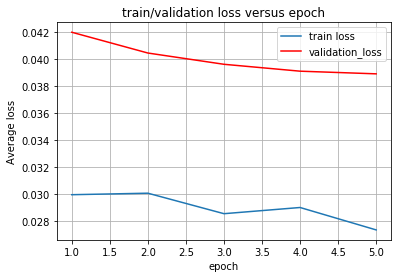

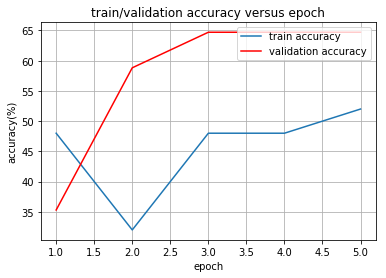

In [54]:
import matplotlib.pyplot as plt

#plot train/validation loss versus epoch
x = list(range(1, 5+1))
plt.figure()
plt.title("train/validation loss versus epoch")
plt.xlabel("epoch")
plt.ylabel("Average loss")
plt.plot(x, train_loss,label="train loss")
plt.plot(x, validation_loss, color='red', label="validation_loss")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
#plot train/test accuracy versus epoch
x = list(range(1, 5+1))
plt.figure()
plt.title("train/validation accuracy versus epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy(%)")
plt.plot(x, train_acc,label="train accuracy")
plt.plot(x, validation_acc, color='red', label="validation accuracy")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()